In [1]:
import nltk

In [3]:
#nltk.download_shell()

In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [3]:
print(len(messages))

5574


In [4]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
import pandas as pd

In [7]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',
                      names=['label','message'])

In [8]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
messages['length'] = messages['message'].apply(len)

In [12]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
%matplotlib inline

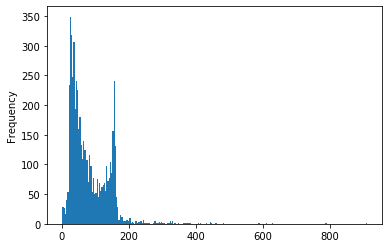

In [15]:
messages['length'].plot.hist(bins=250)

messages['length'].describe()

messages[messages['length'] == 910]['message'].iloc[0]

messages.hist(column = 'length', by='label', bins = 60, figsize=(12,4))

import string

example = 'Sample message! Notice: It has punctuation.'

nopunc = [c for c in example if c not in string.punctuation]

from nltk.corpus import stopwords

nopunc = ''.join(nopunc)

nopunc

nopunc.split()

clean_mess = [word for word in nopunc.split() 
              if word.lower() not in stopwords.words('english')]

clean_mess

def text_process(mess):
    # Remove punc 
    nopunc = [char for char in mess if char not in string.punctuation]
   
    # remove stop words
    nopunc = ''.join(nopunc)
    
    # return list of clean text words
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

from sklearn.feature_extraction.text import CountVectorizer

In [30]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [64]:
print(len(bow_transformer.vocabulary_))

11425


In [53]:
mess4 = messages['message'][3]
mess5 = messages['message'][4]

In [54]:
mess4
mess5

"Nah I don't think he goes to usf, he lives around here though"

In [65]:
bow4 = bow_transformer.transform([mess4])

In [66]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [36]:
bow_transformer.get_feature_names()[9554]

'say'

In [39]:
messages_bow = bow_transformer.transform(messages['message'])

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

In [40]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [41]:
tfdf4 = tfidf_transformer.transform(bow4)

In [74]:
print(tfdf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [44]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['college']]

6.986631457954278

In [45]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [75]:
from sklearn.naive_bayes import MultinomialNB

In [76]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [78]:
spam_detect_model.predict(tfdf4)[0]

'ham'

In [82]:
messages['label'][3]

'ham'

In [ ]:
# Best way to do it, automatically
def text_process(mess):
    # Remove punc 
    nopunc = [char for char in mess if char not in string.punctuation]
   
    # remove stop words
    nopunc = ''.join(nopunc)
    
    # return list of clean text words
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [93]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [98]:
# pipeline.fit(msg_train,label_train)

In [95]:
predictions = pipeline.predict(msg_test)

In [96]:
from sklearn.metrics import classification_report

In [97]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1437
        spam       1.00      0.77      0.87       235

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

yelp = pd.read_csv('yelp.csv')

** Check the head, info , and describe methods on yelp.**

yelp.head()

yelp.info()

yelp.describe()

**Create a new column called "text length" which is the number of words in the text column.**

yelp['text length'] = yelp['text'].apply(len)

# EDA

Let's explore the data

## Imports

**Import the data visualization libraries if you haven't done so already.**



**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

g = sns.FacetGrid(yelp_class,col='stars')
g = g.map(plt.hist, 'text length')

**Create a boxplot of text length for each star category.**

sns.boxplot(x='stars',y='text length', data=yelp)

**Create a countplot of the number of occurrences for each type of star rating.**

sns.countplot(x='stars', data = yelp)

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

yelp.groupby(by='stars').mean()

**Use the corr() method on that groupby dataframe to produce this dataframe:**

corr = yelp.groupby(by='stars').mean().corr()

**Then use seaborn to create a heatmap based off that .corr() dataframe:**

sns.heatmap(corr,annot=True,cmap='plasma')

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

X = yelp_class['text']
y = yelp_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

X = vector.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

nb.fit(X_train,y_train)

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

predictions = nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

from sklearn.feature_extraction.text import TfidfTransformer

** Import Pipeline from sklearn. **

from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

pipline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfdif', TfidfTransformer()),
    ('model', MultinomialNB())
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

pipeline.fit(X_train,y_train)

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

predictions = pipeline.predict(X_test)

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))